In [1]:
import time
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom, poisson
from bogdan_chuzhinov_v2 import *

In [2]:
params = {'amin': 75, 'amax': 90, 'bmin': 500, 'bmax': 600, 'p1': 0.1, 'p2': 0.01, 'p3': 0.3}

**Задание 1**

Для вычислений распределений первой модели используем следующие формулы:

$$p(a=i)=\dfrac{1}{a_{max}-a_{min}+1}=\dfrac{1}{\alpha},\quad a_{min}\le i \le a_{max},$$


$$p(b=i)=\dfrac{1}{b_{max}-b_{min}+1}=\dfrac{1}{\beta},\quad b_{min}\le i \le b_{max},$$

$$p(c=i)=\sum\limits_{a,b,d}p(a,b,c=i,d)=\sum\limits_{a,b,d}p(d|c)p(c=i|a,b)p(a)p(b)=\dfrac{1}{\alpha\beta}\sum\limits_{a,b}p(c=i|a,b)=\dfrac{1}{\alpha\beta}\sum\limits_{a+b\ge i}(p_a*p_b)_i,$$
где $c_{min}=a_{min}+b_{min}\le i\le a_{max}+b_{max}=c_{max}$, а $p_a * p_b$ --- свертка распределений $Bin(a, p_1)$ и $Bin(b, p_2)$,


$$p(d=i)=\sum\limits_{a,b,c}p(a,b,c,d=i)=\sum\limits_{a,b,c}p(d=i|c)p(c|a,b)p(a)p(b)=\dfrac{1}{\alpha\beta}\sum\limits_{a+b\ge c,~i\ge c}C_c^{i-c}p_3^{i-c}(1-p_3)^{2c-i}(p_a*p_b)_c.$$


$\newline$
$\newline$

Для вычислений распределений второй модели используем следующие формулы:

$$p(a=i)=\dfrac{1}{a_{max}-a_{min}+1}=\dfrac{1}{\alpha},\quad a_{min}\le i \le a_{max},$$


$$p(b=i)=\dfrac{1}{b_{max}-b_{min}+1}=\dfrac{1}{\beta},\quad b_{min}\le i \le b_{max},$$

$$p(c=i)=\sum\limits_{a,b,d}p(a,b,c=i,d)=\sum\limits_{a,b,d}p(d|c)p(c=i|a,b)p(a)p(b)=\dfrac{1}{\alpha\beta}\sum\limits_{a,b}p(c=i|a,b)=\sum\limits_{a,b}\dfrac{(ap_1+bp_2)^ie^{-(ap_1+bp_2)}}{i!\alpha\beta},$$


$$p(d=i)=\sum\limits_{a,b,c}p(a,b,c,d=i)=\sum\limits_{a,b,c}p(d=i|c)p(c|a,b)p(a)p(b)=\dfrac{1}{\alpha\beta}\sum\limits_{a,b,~c\le i}C_c^{i-c}p_3^{i-c}(1-p_3)^{2c-i}\dfrac{(ap_1+bp_2)^ce^{-(ap_1+bp_2)}}{c!}.$$

**Задание 2**

Для первой модели найдем матожидания используя тождество Вальда:

$$\mathbb{E}(a) = \dfrac{a_{min}+a_{max}}{2}=82.5,$$

$$\mathbb{E}(b) = \dfrac{b_{min}+b_{max}}{2}=550,$$

$$\mathbb{E}(c) = \mathbb{E}{\sum\limits_{i=0}^a\xi_i} + \mathbb{E}{\sum\limits_{i=0}^b\xi'_i}=\mathbb{E}{a}p_1+\mathbb{E}{b}p_2=13.75,$$

$$\mathbb{E}(d) = \mathbb{E}{c} + \mathbb{E}{\sum\limits_{i=0}^c\xi_i}=\mathbb{E}{c}+\mathbb{E}{c}p_3=17.875.$$

Для второй модели в случае с величиной $c$ придется посчитать по-честному:

$\mathbb{E}{c}=\sum\limits_{a,b,c,d}cp(a,b,c,d)=\sum\limits_{a,b,c,d}cp(d|c)p(c|a,b)p(a)p(b)=\sum\limits_{a,b,c}cp(c|a,b)p(a)p(b)=\dfrac{1}{\alpha\beta}\sum\limits_{a,b,c}cp(c|a,b)=\dfrac{1}{\alpha\beta}\sum\limits_{a,b}\mathbb{E}(c|a,b)=\dfrac{1}{\alpha\beta}\sum\limits_{a,b}(ap_1+bp_2)=\mathbb{E}{a}p_1+\mathbb{E}{b}p_2$
Получили то же, что и в первой модели, поэтому $d$ не пересчитываем.

Аналогично често считаем дисперсию для первой модели:
$$\mathbb{D}{a}=\dfrac{\alpha^2-1}{12}=21.25,$$

$$\mathbb{D}{b}=\dfrac{\beta^2-1}{12}=850,$$

$$\mathbb{D}{c}=\mathbb{E}c^2-(\mathbb{E}c)^2=\sum\limits_{a,b,c,d}c^2p(d|c)p(c|a,b)p(a)p(b)-(\mathbb{E}c)^2=\sum\limits_{a,b,c}c^2p(c|a,b)p(a)p(b)-(\mathbb{E}c)^2=\dfrac{1}{\alpha\beta}\sum\limits_{a,b,c}c^2p(c|a,b)-(\mathbb{E}c)^2=$$
$$=\dfrac{1}{\alpha\beta}\sum\limits_{a,b}(\mathbb{D}(c|a,b) + (\mathbb{E}(c|a,b))^2)-(\mathbb{E}c)^2=$$
$$=\dfrac{1}{\alpha\beta}\sum\limits_{a,b}(ap_1(1-p_1)+bp_2(1-p_2) + a^2p_1^2+2abp_1p_1+b^2p_2^2)-(\mathbb{E}c)^2=p_1(1-p_1)\mathbb{E}a+p_2(1-p_2)\mathbb{E}b+p_1^2\mathbb{D}a+p_2^2\mathbb{D}b=13.1765,$$

$$\mathbb{D}{d}=p_3(1-p_3)(p_1\mathbb{E}a+p_2\mathbb{E}b)+(1+2p_3+p_3^2)(p_1(1-p_1)\mathbb{E}a+p_2(1-p_2)\mathbb{E}b+p_1^2(\mathbb{D}a+(\mathbb{E}a)^2)+2p_1p_2\mathbb{E}a\mathbb{E}b+p_2^2(\mathbb{D}b+(\mathbb{E}b)^2))=25.140575.$$

Считать то же самое для второй модели:
$$\mathbb{D}{c}=p_1\mathbb{E}a+p_2\mathbb{E}b+p_1^2\mathbb{D}a+p_2^2\mathbb{D}b=14.0475,$$

$$\mathbb{D}d=p_3(1-p_3)\mathbb{E}c+(1+p_3)^2(\mathbb{D}c+\mathbb{E}^2c)-\mathbb{E}^2d=26.627775.$$

Компьютерные вычисления дают те же результаты.

Матожидание p(a), модель 1: 82.5
Матожидание p(b), модель 1: 549.9999999999999
Матожидание p(c), модель 1: 13.749999999999993
Матожидание p(d), модель 1: 17.874999999999986


Матожидание p(a), модель 2: 82.5
Матожидание p(b), модель 2: 549.9999999999999
Матожидание p(c), модель 2: 13.749999999999993
Матожидание p(d), модель 2: 17.874999999999986


Дисперсия p(a), модель 1: 21.25
Дисперсия p(b), модель 1: 850.0000000000582
Дисперсия p(c), модель 1: 13.167500000000103
Дисперсия p(d), модель 1: 25.140575000000297


Дисперсия p(a), модель 2: 21.25
Дисперсия p(b), модель 2: 850.0000000000582
Дисперсия p(c), модель 2: 14.04750000000007
Дисперсия p(d), модель 2: 26.62777500000027


**Задание 3**

Сначала графики для первой модели:

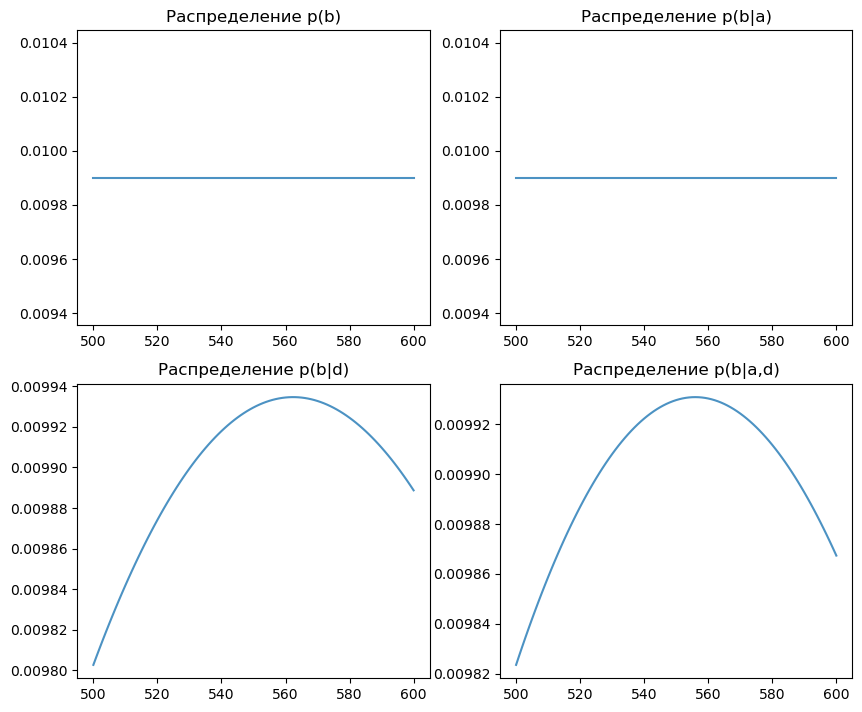

In [3]:
a = np.array([83])
d = np.array([18])

plt.figure(figsize=(10,6))

prob, val = pb(params, 1)
plt.subplot(2, 2, 1)
plt.plot(val, prob, alpha=0.8)
plt.title("Распределение p(b)")

prob, val = pb_a(a, params, 1)
plt.subplot(2, 2, 2)
plt.plot(val, prob[:, 0], alpha=0.8)
plt.title("Распределение p(b|a)")

prob, val = pb_d(d, params, 1)
plt.subplot(2, 2, 3)
plt.plot(val, prob[:, 0], alpha=0.8)
plt.title("Распределение p(b|d)")

prob, val = pb_ad(a, d, params, 1)
plt.subplot(2, 2, 4)
plt.plot(val, prob[:, 0, 0], alpha=0.8)
plt.title("Распределение p(b|a,d)")

plt.subplots_adjust(bottom=-0.2)
plt.show()

Теперь для второй:

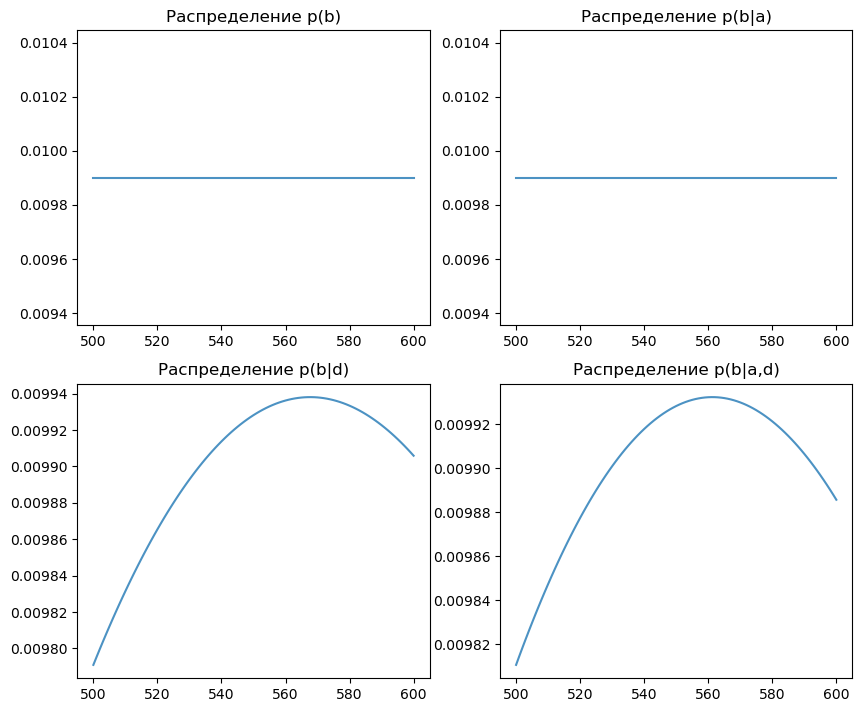

In [4]:
plt.figure(figsize=(10,6))

prob, val = pb(params, 2)
plt.subplot(2, 2, 1)
plt.plot(val, prob, alpha=0.8)
plt.title("Распределение p(b)")

prob, val = pb_a(a, params, 2)
plt.subplot(2, 2, 2)
plt.plot(val, prob[:, 0], alpha=0.8)
plt.title("Распределение p(b|a)")

prob, val = pb_d(d, params, 2)
plt.subplot(2, 2, 3)
plt.plot(val, prob[:, 0], alpha=0.8)
plt.title("Распределение p(b|d)")

prob, val = pb_ad(a, d, params, 2)
plt.subplot(2, 2, 4)
plt.plot(val, prob[:, 0, 0], alpha=0.8)
plt.title("Распределение p(b|a,d)")

plt.subplots_adjust(bottom=-0.2)
plt.show()

Теперь вычислим матожидания и дисперсии.

Матожидание p(b), модель 1: 549.9999999999999
Матожидание p(b|a), модель 1: 549.9999999999999
Матожидание p(b|d), модель 1: 550.0726755897829
Матожидание p(b|a,d), модель 1: 550.0363468930655


Матожидание p(b), модель 2: 549.9999999999999
Матожидание p(b|a), модель 2: 549.9999999999999
Матожидание p(b|d), модель 2: 550.0977797601528
Матожидание p(b|a,d), модель 2: 550.0634796135495


Дисперсия p(b), модель 1: 850.0000000000582
Дисперсия p(b|a), модель 1: 850.0000000000582
Дисперсия p(b|d), модель 1: 848.037891839107
Дисперсия p(b|a,d), модель 1: 848.0311255460838


Дисперсия p(b), модель 2: 850.0000000000582
Дисперсия p(b|a), модель 2: 850.0000000000582
Дисперсия p(b|d), модель 2: 848.1280274535529
Дисперсия p(b|a,d), модель 2: 848.1231120711891


**Задание 4**

Точно так же как в задании 2 находим:
$$\mathbb{D}(c|b)=p_1(1-p_1)\mathbb{E}a+p_1^2\mathbb{D}a+bp_2(1-p_2)$$

$$\mathbb{D}(c|a)=p_2(1-p_2)\mathbb{E}b+p_2^2\mathbb{D}b+ap_1(1-p_1)$$

Получаем неравенство
$$p_1(1-p_1)\mathbb{E}a+p_1^2\mathbb{D}a+bp_2(1-p_2)<p_2(1-p_2)\mathbb{E}b+p_2^2\mathbb{D}b+ap_1(1-p_1)$$

которое перепишем в точке $a=\mathbb{E}a+0.5$ и $b=\mathbb{E}$, используя обозначения $A=\mathbb{D}a$ и $B=\mathbb{D}b$.

$$p_1^2(A+\dfrac{1}{2})-\dfrac{p_1}{2}<p_2^2B$$

Далее перепишем в каноническом виде:
$$\dfrac{(p_1-\frac{1}{2(2A+1)})^2}{\frac{1}{4(2A+1)^2}}-\dfrac{p_2^2}{\frac{1}{8B(2A+1)}}<1$$

Остается заметить, что гипербола чересекает внутренность множества $[0,1]\times[0,1]$, так как $\dfrac{1}{2A+1}<1$. А значит два рассматриваемых в задании множества линейно неразделимы.